In [61]:
#Import packages to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
#set the figure size
matplotlib.rcParams['figure.figsize'] = (12,8)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#ingnore the warning
pd.options.mode.chained_assignment = None

In [3]:
pd.set_option("max_rows",1000)

In [62]:
df = pd.read_csv("listings.csv")
#Look at how many rows are with missing values.
np.sum(df.isnull())

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               2
summary                                          228
space                                           2196
description                                      111
experiences_offered                                0
neighborhood_overview                           2825
notes                                           4834
transit                                         2730
access                                          3557
interaction                                     3065
house_rules                                     3408
thumbnail_url                                   9329
medium_url                                      9329
picture_url                                        0
xl_picture_url                                

In [5]:
#To see the percentage of missing values in each column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{0} - {1}%'.format(col,round(pct_missing*100)))

id - 0.0%
listing_url - 0.0%
scrape_id - 0.0%
last_scraped - 0.0%
name - 0.0%
summary - 2.0%
space - 24.0%
description - 1.0%
experiences_offered - 0.0%
neighborhood_overview - 30.0%
notes - 52.0%
transit - 29.0%
access - 38.0%
interaction - 33.0%
house_rules - 37.0%
thumbnail_url - 100.0%
medium_url - 100.0%
picture_url - 0.0%
xl_picture_url - 100.0%
host_id - 0.0%
host_url - 0.0%
host_name - 0.0%
host_since - 0.0%
host_location - 0.0%
host_about - 35.0%
host_response_time - 32.0%
host_response_rate - 32.0%
host_acceptance_rate - 24.0%
host_is_superhost - 0.0%
host_thumbnail_url - 0.0%
host_picture_url - 0.0%
host_neighbourhood - 10.0%
host_listings_count - 0.0%
host_total_listings_count - 0.0%
host_verifications - 0.0%
host_has_profile_pic - 0.0%
host_identity_verified - 0.0%
street - 0.0%
neighbourhood - 0.0%
neighbourhood_cleansed - 0.0%
neighbourhood_group_cleansed - 100.0%
city - 0.0%
state - 0.0%
zipcode - 1.0%
market - 0.0%
smart_location - 0.0%
country_code - 0.0%
country - 0.

In [6]:
#select columns with less than 50% missing values
df = df.loc[:, df.isnull().mean() < .5]

In [7]:
#lets see what remanin columns are 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{0} - {1}%'.format(col,round(pct_missing*100)))

id - 0.0%
listing_url - 0.0%
scrape_id - 0.0%
last_scraped - 0.0%
name - 0.0%
summary - 2.0%
space - 24.0%
description - 1.0%
experiences_offered - 0.0%
neighborhood_overview - 30.0%
transit - 29.0%
access - 38.0%
interaction - 33.0%
house_rules - 37.0%
picture_url - 0.0%
host_id - 0.0%
host_url - 0.0%
host_name - 0.0%
host_since - 0.0%
host_location - 0.0%
host_about - 35.0%
host_response_time - 32.0%
host_response_rate - 32.0%
host_acceptance_rate - 24.0%
host_is_superhost - 0.0%
host_thumbnail_url - 0.0%
host_picture_url - 0.0%
host_neighbourhood - 10.0%
host_listings_count - 0.0%
host_total_listings_count - 0.0%
host_verifications - 0.0%
host_has_profile_pic - 0.0%
host_identity_verified - 0.0%
street - 0.0%
neighbourhood - 0.0%
neighbourhood_cleansed - 0.0%
city - 0.0%
state - 0.0%
zipcode - 1.0%
market - 0.0%
smart_location - 0.0%
country_code - 0.0%
country - 0.0%
latitude - 0.0%
longitude - 0.0%
is_location_exact - 0.0%
property_type - 0.0%
room_type - 0.0%
accommodates - 0.0%


## Now let's look at the irrelevant observations.
* Eliminates columns with irrelevant observations.


In [8]:
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(df.columns)]
col_mapping

['0:id',
 '1:listing_url',
 '2:scrape_id',
 '3:last_scraped',
 '4:name',
 '5:summary',
 '6:space',
 '7:description',
 '8:experiences_offered',
 '9:neighborhood_overview',
 '10:transit',
 '11:access',
 '12:interaction',
 '13:house_rules',
 '14:picture_url',
 '15:host_id',
 '16:host_url',
 '17:host_name',
 '18:host_since',
 '19:host_location',
 '20:host_about',
 '21:host_response_time',
 '22:host_response_rate',
 '23:host_acceptance_rate',
 '24:host_is_superhost',
 '25:host_thumbnail_url',
 '26:host_picture_url',
 '27:host_neighbourhood',
 '28:host_listings_count',
 '29:host_total_listings_count',
 '30:host_verifications',
 '31:host_has_profile_pic',
 '32:host_identity_verified',
 '33:street',
 '34:neighbourhood',
 '35:neighbourhood_cleansed',
 '36:city',
 '37:state',
 '38:zipcode',
 '39:market',
 '40:smart_location',
 '41:country_code',
 '42:country',
 '43:latitude',
 '44:longitude',
 '45:is_location_exact',
 '46:property_type',
 '47:room_type',
 '48:accommodates',
 '49:bathrooms',
 '50

In [9]:
df = df.iloc[:,np.r_[19,21:24,27:72,74:96]]

In [10]:
#showing all coli
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(df.columns)]
col_mapping

['0:host_location',
 '1:host_response_time',
 '2:host_response_rate',
 '3:host_acceptance_rate',
 '4:host_neighbourhood',
 '5:host_listings_count',
 '6:host_total_listings_count',
 '7:host_verifications',
 '8:host_has_profile_pic',
 '9:host_identity_verified',
 '10:street',
 '11:neighbourhood',
 '12:neighbourhood_cleansed',
 '13:city',
 '14:state',
 '15:zipcode',
 '16:market',
 '17:smart_location',
 '18:country_code',
 '19:country',
 '20:latitude',
 '21:longitude',
 '22:is_location_exact',
 '23:property_type',
 '24:room_type',
 '25:accommodates',
 '26:bathrooms',
 '27:bedrooms',
 '28:beds',
 '29:bed_type',
 '30:amenities',
 '31:price',
 '32:security_deposit',
 '33:cleaning_fee',
 '34:guests_included',
 '35:extra_people',
 '36:minimum_nights',
 '37:maximum_nights',
 '38:minimum_minimum_nights',
 '39:maximum_minimum_nights',
 '40:minimum_maximum_nights',
 '41:maximum_maximum_nights',
 '42:minimum_nights_avg_ntm',
 '43:maximum_nights_avg_ntm',
 '44:calendar_updated',
 '45:has_availability

In [11]:
df.head()

,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,"Washington, District of Columbia, United States",within an hour,100%,100%,Shaw,5.0,5.0,"['email', 'phone', 'facebook', 'reviews', 'kba...",t,t,...,"{""DISTRICT OF COLUMBIA"","" WASHINGTON""}",t,f,strict_14_with_grace_period,f,f,5,5,0,0
1,"Washington D.C., District of Columbia, United ...",NaN,NaN,NaN,Manor Park,0.0,0.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,...,"{""DISTRICT OF COLUMBIA"","" WASHINGTON""}",f,f,strict_14_with_grace_period,f,f,1,1,0,0
2,"Washington, District of Columbia, United States",NaN,NaN,0%,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,...,"{""DISTRICT OF COLUMBIA"","" WASHINGTON""}",f,f,strict_14_with_grace_period,f,f,1,0,1,0
3,"Washington D.C., District of Columbia, United ...",within a few hours,100%,98%,Anacostia,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,...,"{""DISTRICT OF COLUMBIA"","" WASHINGTON""}",f,f,moderate,f,f,2,0,2,0
4,"Washington, District of Columbia, United States",NaN,NaN,NaN,Mt. Pleasant,1.0,1.0,"['email', 'phone']",t,f,...,"{""DISTRICT OF COLUMBIA"","" WASHINGTON""}",f,f,moderate,f,f,1,0,1,0


In [12]:
df = df[df['host_response_time'].notna()]
df = df[df["review_scores_value"].notna()]

In [13]:
np.sum(df.isnull())
df.head()
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(df.columns)]
col_mapping

['0:host_location',
 '1:host_response_time',
 '2:host_response_rate',
 '3:host_acceptance_rate',
 '4:host_neighbourhood',
 '5:host_listings_count',
 '6:host_total_listings_count',
 '7:host_verifications',
 '8:host_has_profile_pic',
 '9:host_identity_verified',
 '10:street',
 '11:neighbourhood',
 '12:neighbourhood_cleansed',
 '13:city',
 '14:state',
 '15:zipcode',
 '16:market',
 '17:smart_location',
 '18:country_code',
 '19:country',
 '20:latitude',
 '21:longitude',
 '22:is_location_exact',
 '23:property_type',
 '24:room_type',
 '25:accommodates',
 '26:bathrooms',
 '27:bedrooms',
 '28:beds',
 '29:bed_type',
 '30:amenities',
 '31:price',
 '32:security_deposit',
 '33:cleaning_fee',
 '34:guests_included',
 '35:extra_people',
 '36:minimum_nights',
 '37:maximum_nights',
 '38:minimum_minimum_nights',
 '39:maximum_minimum_nights',
 '40:minimum_maximum_nights',
 '41:maximum_maximum_nights',
 '42:minimum_nights_avg_ntm',
 '43:maximum_nights_avg_ntm',
 '44:calendar_updated',
 '45:has_availability

## Choosing our variables

* First, let's toss out some variables. Our reasons why we chose those variables included too many NaN in that column(and we think it's also hard to replace it with other made-up value) or based on our domain knowledge, our group  thinks it will has tiny effects on our final predictions. 

In [14]:
#choosing variables
df = df.iloc[:,np.r_[1:3,6:9,11,22:49,53:60,62:70]]

In [15]:
len(df.columns)

48

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5445 entries, 0 to 9285
Data columns (total 48 columns):
host_response_time                              5445 non-null object
host_response_rate                              5445 non-null object
host_total_listings_count                       5445 non-null float64
host_verifications                              5445 non-null object
host_has_profile_pic                            5445 non-null object
neighbourhood                                   5445 non-null object
is_location_exact                               5445 non-null object
property_type                                   5445 non-null object
room_type                                       5445 non-null object
accommodates                                    5445 non-null int64
bathrooms                                       5440 non-null float64
bedrooms                                        5441 non-null float64
beds                                            5437 non-null f

In [17]:
np.sum(df.isnull())

host_response_time                                 0
host_response_rate                                 0
host_total_listings_count                          0
host_verifications                                 0
host_has_profile_pic                               0
neighbourhood                                      0
is_location_exact                                  0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                          5
bedrooms                                           4
beds                                               8
bed_type                                           0
amenities                                          0
price                                              0
security_deposit                                1032
cleaning_fee                                     333
guests_included                               

In [18]:
df = df[df['review_scores_accuracy'].notnull()]

In [19]:
df.head()

,host_response_time,host_response_rate,host_total_listings_count,host_verifications,host_has_profile_pic,neighbourhood,is_location_exact,property_type,room_type,accommodates,...,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,within an hour,100%,5.0,"['email', 'phone', 'facebook', 'reviews', 'kba...",t,Shaw,t,Townhouse,Entire home/apt,16,...,10.0,9.0,t,f,strict_14_with_grace_period,f,f,5,5,0
3,within a few hours,100%,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,Anacostia,f,House,Private room,1,...,8.0,9.0,f,f,moderate,f,f,2,0,2
5,within an hour,100%,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba...",t,Michigan Park,t,House,Entire home/apt,9,...,8.0,8.0,t,f,flexible,f,t,1,1,0
6,within an hour,100%,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Capitol Hill,t,House,Private room,2,...,10.0,10.0,f,f,moderate,f,f,2,0,2
8,within a few hours,100%,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Eastland Gardens,t,House,Private room,4,...,9.0,10.0,f,f,strict_14_with_grace_period,t,t,2,0,2


## Cleaning the data!
* We try imputing the more meaningful data instead of dropping missing variable or imputing 0. We impute mean, median or mode to respective columns. We try to make the data more close the normal distribution when it contain missing values and we think imputing the mean, median, or mode is  the most appropriate way.

In [20]:
df.price = df.price.str.replace('$',"")
df.extra_people = df.extra_people.str.replace('$',"")
df.host_response_rate = df.host_response_rate.str.replace('%','') 
df.head()

,host_response_time,host_response_rate,host_total_listings_count,host_verifications,host_has_profile_pic,neighbourhood,is_location_exact,property_type,room_type,accommodates,...,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,within an hour,100,5.0,"['email', 'phone', 'facebook', 'reviews', 'kba...",t,Shaw,t,Townhouse,Entire home/apt,16,...,10.0,9.0,t,f,strict_14_with_grace_period,f,f,5,5,0
3,within a few hours,100,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,Anacostia,f,House,Private room,1,...,8.0,9.0,f,f,moderate,f,f,2,0,2
5,within an hour,100,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba...",t,Michigan Park,t,House,Entire home/apt,9,...,8.0,8.0,t,f,flexible,f,t,1,1,0
6,within an hour,100,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Capitol Hill,t,House,Private room,2,...,10.0,10.0,f,f,moderate,f,f,2,0,2
8,within a few hours,100,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Eastland Gardens,t,House,Private room,4,...,9.0,10.0,f,f,strict_14_with_grace_period,t,t,2,0,2


In [21]:
df.amenities = df.amenities.str.replace("{",'')
df.amenities = df.amenities.str.replace("}",'')
df.amenities = df.amenities.str.replace("\"",'')
df.amenities = df.amenities.str.split(',')
df.head()

,host_response_time,host_response_rate,host_total_listings_count,host_verifications,host_has_profile_pic,neighbourhood,is_location_exact,property_type,room_type,accommodates,...,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,within an hour,100,5.0,"['email', 'phone', 'facebook', 'reviews', 'kba...",t,Shaw,t,Townhouse,Entire home/apt,16,...,10.0,9.0,t,f,strict_14_with_grace_period,f,f,5,5,0
3,within a few hours,100,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,Anacostia,f,House,Private room,1,...,8.0,9.0,f,f,moderate,f,f,2,0,2
5,within an hour,100,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba...",t,Michigan Park,t,House,Entire home/apt,9,...,8.0,8.0,t,f,flexible,f,t,1,1,0
6,within an hour,100,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Capitol Hill,t,House,Private room,2,...,10.0,10.0,f,f,moderate,f,f,2,0,2
8,within a few hours,100,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Eastland Gardens,t,House,Private room,4,...,9.0,10.0,f,f,strict_14_with_grace_period,t,t,2,0,2


In [22]:
#convert amentities(a column of list to dummies)
amenitieDummies = pd.get_dummies(df['amenities'].apply(pd.Series).stack()).sum(level = 0)
amenitieDummies

,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Amazon Echo,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,...,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9204,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9214,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9234,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
#covert host_verificatio into dummies 
df.host_verifications= df.host_verifications.str.replace("[",'')
df.host_verifications= df.host_verifications.str.replace("]",'')
df.host_verifications= df.host_verifications.str.replace("\'",'')
df.host_verifications = df.host_verifications.str.split(',')


In [24]:
hostVerDummies = pd.get_dummies(df['host_verifications'].apply(pd.Series).stack()).sum(level = 0)

In [25]:
# put dataframe back together
df1 = pd.concat([df,hostVerDummies,amenitieDummies],axis=1)

In [26]:
df1.security_deposit= df1.security_deposit.fillna(value=0)
df1.cleaning_fee = df.cleaning_fee.fillna(0)
df1.bathrooms = df1.bathrooms.fillna(0)
df1.beds= df1.beds.fillna(0)
df1.head()

,host_response_time,host_response_rate,host_total_listings_count,host_verifications,host_has_profile_pic,neighbourhood,is_location_exact,property_type,room_type,accommodates,...,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,within an hour,100,5.0,"[email, phone, facebook, reviews, kba, wo...",t,Shaw,t,Townhouse,Entire home/apt,16,...,0,0,0,0,0,1,0,0,0,0
3,within a few hours,100,2.0,"[email, phone, reviews, jumio, offline_gov...",t,Anacostia,f,House,Private room,1,...,0,0,0,0,0,1,0,0,0,0
5,within an hour,100,2.0,"[email, phone, facebook, reviews, kba, wo...",t,Michigan Park,t,House,Entire home/apt,9,...,0,0,0,0,0,1,0,0,0,0
6,within an hour,100,2.0,"[email, phone, facebook, reviews, kba]",t,Capitol Hill,t,House,Private room,2,...,0,0,0,0,0,1,0,0,1,1
8,within a few hours,100,3.0,"[email, phone, facebook, reviews, jumio, ...",t,Eastland Gardens,t,House,Private room,4,...,0,0,0,0,0,1,0,0,0,0


In [27]:
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(df1.columns)]
col_mapping

['0:host_response_time',
 '1:host_response_rate',
 '2:host_total_listings_count',
 '3:host_verifications',
 '4:host_has_profile_pic',
 '5:neighbourhood',
 '6:is_location_exact',
 '7:property_type',
 '8:room_type',
 '9:accommodates',
 '10:bathrooms',
 '11:bedrooms',
 '12:beds',
 '13:bed_type',
 '14:amenities',
 '15:price',
 '16:security_deposit',
 '17:cleaning_fee',
 '18:guests_included',
 '19:extra_people',
 '20:minimum_nights',
 '21:maximum_nights',
 '22:minimum_minimum_nights',
 '23:maximum_minimum_nights',
 '24:minimum_maximum_nights',
 '25:maximum_maximum_nights',
 '26:minimum_nights_avg_ntm',
 '27:maximum_nights_avg_ntm',
 '28:calendar_updated',
 '29:has_availability',
 '30:availability_30',
 '31:availability_60',
 '32:availability_90',
 '33:review_scores_rating',
 '34:review_scores_accuracy',
 '35:review_scores_cleanliness',
 '36:review_scores_checkin',
 '37:review_scores_communication',
 '38:review_scores_location',
 '39:review_scores_value',
 '40:instant_bookable',
 '41:is_busi

In [28]:
 [c for c in enumerate(df1.columns)]

[(0, 'host_response_time'),
 (1, 'host_response_rate'),
 (2, 'host_total_listings_count'),
 (3, 'host_verifications'),
 (4, 'host_has_profile_pic'),
 (5, 'neighbourhood'),
 (6, 'is_location_exact'),
 (7, 'property_type'),
 (8, 'room_type'),
 (9, 'accommodates'),
 (10, 'bathrooms'),
 (11, 'bedrooms'),
 (12, 'beds'),
 (13, 'bed_type'),
 (14, 'amenities'),
 (15, 'price'),
 (16, 'security_deposit'),
 (17, 'cleaning_fee'),
 (18, 'guests_included'),
 (19, 'extra_people'),
 (20, 'minimum_nights'),
 (21, 'maximum_nights'),
 (22, 'minimum_minimum_nights'),
 (23, 'maximum_minimum_nights'),
 (24, 'minimum_maximum_nights'),
 (25, 'maximum_maximum_nights'),
 (26, 'minimum_nights_avg_ntm'),
 (27, 'maximum_nights_avg_ntm'),
 (28, 'calendar_updated'),
 (29, 'has_availability'),
 (30, 'availability_30'),
 (31, 'availability_60'),
 (32, 'availability_90'),
 (33, 'review_scores_rating'),
 (34, 'review_scores_accuracy'),
 (35, 'review_scores_cleanliness'),
 (36, 'review_scores_checkin'),
 (37, 'review_sco

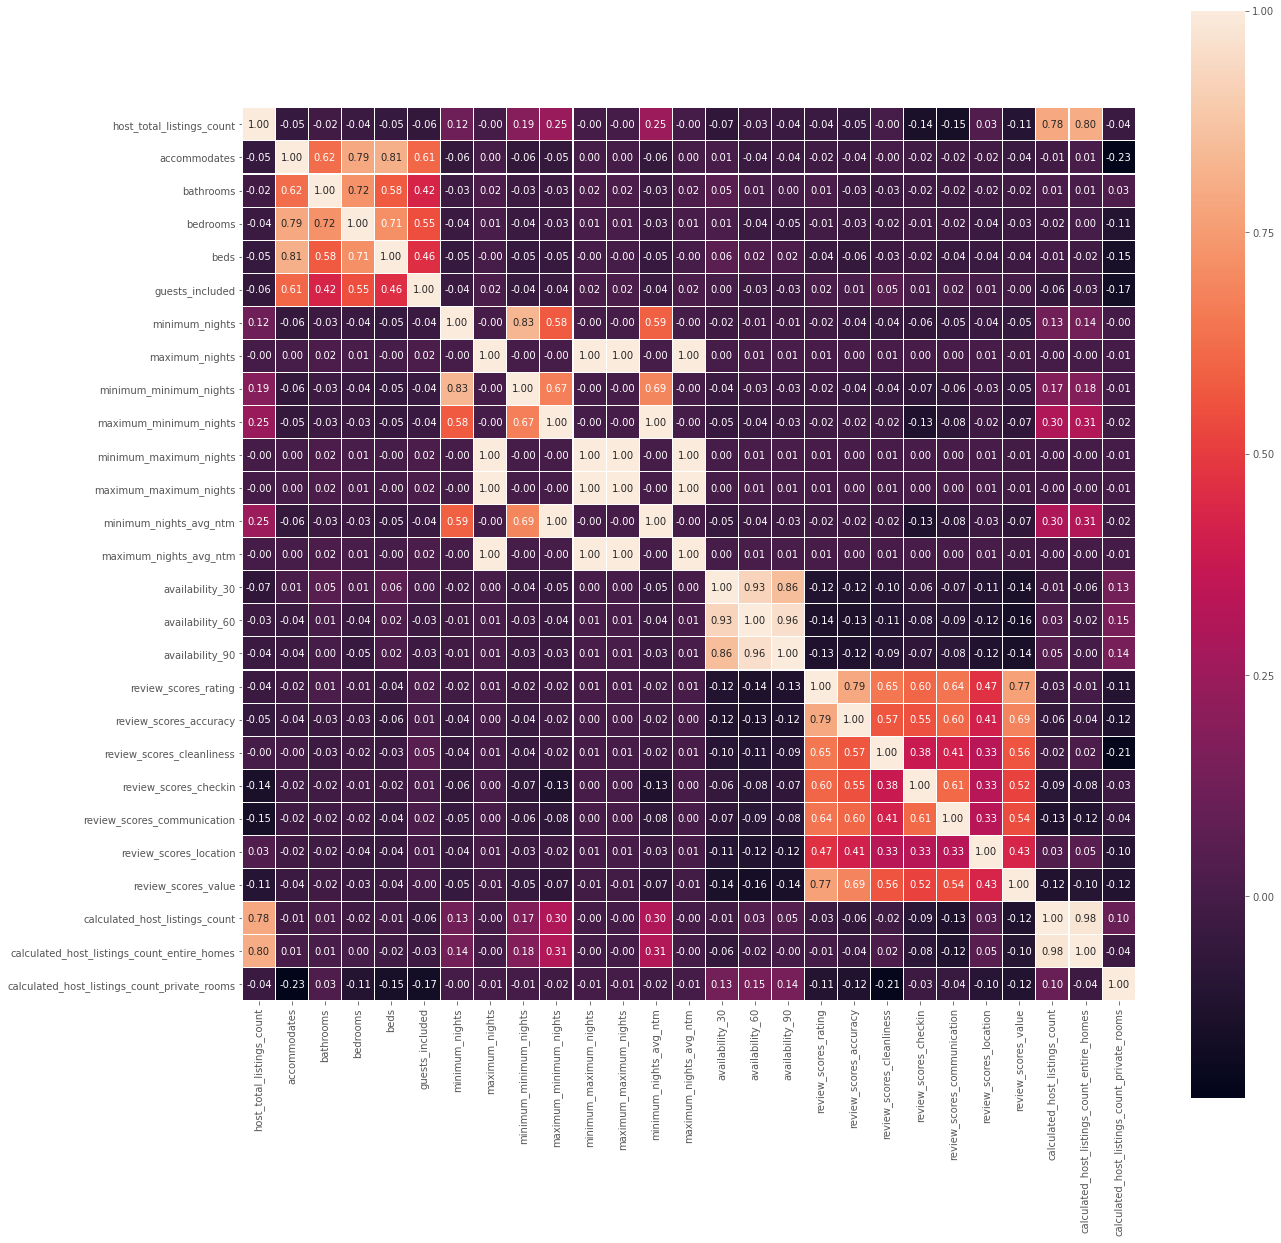

In [29]:
corr = df.drop('price', axis=1).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmax=1.0, linewidths=0.1, annot=True, 
                 annot_kws={'size':10}, square=True, fmt=".2f")
plt.show()

In [30]:
#remove high correlation features to avoid collinearity issue
df1 = df1.drop(['host_verifications','calendar_updated', "calculated_host_listings_count_entire_homes","bedrooms",'minimum_minimum_nights','maximum_maximum_nights'], axis =1)
df1.head()

,host_response_time,host_response_rate,host_total_listings_count,host_has_profile_pic,neighbourhood,is_location_exact,property_type,room_type,accommodates,bathrooms,...,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,within an hour,100,5.0,t,Shaw,t,Townhouse,Entire home/apt,16,3.5,...,0,0,0,0,0,1,0,0,0,0
3,within a few hours,100,2.0,t,Anacostia,f,House,Private room,1,1.0,...,0,0,0,0,0,1,0,0,0,0
5,within an hour,100,2.0,t,Michigan Park,t,House,Entire home/apt,9,1.0,...,0,0,0,0,0,1,0,0,0,0
6,within an hour,100,2.0,t,Capitol Hill,t,House,Private room,2,1.5,...,0,0,0,0,0,1,0,0,1,1
8,within a few hours,100,3.0,t,Eastland Gardens,t,House,Private room,4,1.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,within an hour,97,0.0,t,Congress Heights,t,Apartment,Entire home/apt,5,1.0,...,0,0,0,0,0,1,0,0,0,0
9204,within an hour,100,0.0,t,Shepherd Park,t,Condominium,Entire home/apt,4,1.0,...,0,0,0,0,0,1,0,0,0,0
9214,within an hour,100,3.0,t,16th Street Heights,t,Townhouse,Private room,2,1.5,...,0,0,0,0,0,1,0,0,0,0
9234,within a few hours,100,1.0,t,Near Northeast/H Street Corridor,t,Guest suite,Entire home/apt,3,1.0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
df1 = df1.drop(['amenities'],axis = 1)

In [32]:
 df1 = pd.get_dummies(df1, columns=['host_response_time', 'neighbourhood', 'host_has_profile_pic', 'is_location_exact', 
                            'property_type','room_type',"bed_type","has_availability","cancellation_policy", "require_guest_profile_picture","instant_bookable",
                                   "is_business_travel_ready",'cancellation_policy',"require_guest_phone_verification"], drop_first=True)

In [34]:
df1.price= df1.price.str.replace(",",'').astype(float)

In [35]:
df1.security_deposit= df1.security_deposit.str.replace("$",'')
df1.security_deposit= df1.security_deposit.str.replace(",",'').astype(float)
df1.cleaning_fee= df1.cleaning_fee.str.replace("$",'')
df1.cleaning_fee= df1.cleaning_fee.str.replace(",",'').astype(float)
df1.extra_people= df1.extra_people.str.replace("$",'')
df1.extra_people= df1.extra_people.str.replace(",",'').astype(float)

In [38]:
df1.security_deposit= df1.security_deposit.fillna(value=0)
df1.cleaning_fee = df1.cleaning_fee.fillna(0)
df1.head()

,host_response_rate,host_total_listings_count,accommodates,bathrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,...,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_t,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_phone_verification_t
0,100,5.0,16,3.5,5.0,433.0,500.0,250.0,5,20.0,...,0,0,0,1,0,0,1,0,0,0
3,100,2.0,1,1.0,1.0,55.0,0.0,0.0,1,0.0,...,0,0,0,0,1,0,0,0,0,0
5,100,2.0,9,1.0,2.0,120.0,200.0,85.0,3,20.0,...,0,0,0,1,0,0,0,0,0,1
6,100,2.0,2,1.5,1.0,83.0,0.0,35.0,1,10.0,...,0,0,0,0,1,0,0,0,0,0
8,100,3.0,4,1.0,1.0,52.0,200.0,55.0,2,10.0,...,0,0,1,0,0,0,1,0,0,1


In [39]:
df1.cleaning_fee= df1.cleaning_fee.astype(float)

## ML Start!

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [41]:
X = df1.drop(['price'],axis=1)
y = df1['price']

In [42]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Regression Model

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Knn Regressor 

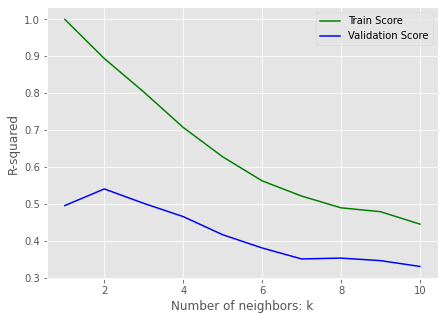

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.893944,0.540681,{'n_neighbors': 2}
2,0.803395,0.501675,{'n_neighbors': 3}
3,0.999999,0.495627,{'n_neighbors': 1}
4,0.707337,0.465730,{'n_neighbors': 4}
5,0.627769,0.416680,{'n_neighbors': 5}
6,0.562672,0.380813,{'n_neighbors': 6}
7,0.489529,0.353306,{'n_neighbors': 8}
8,0.521397,0.351086,{'n_neighbors': 7}
9,0.479024,0.346492,{'n_neighbors': 9}


In [44]:
param_grid = {'n_neighbors': list(range(1, 11))}
knn_reg = GridSearchCV(KNeighborsRegressor(),
                       param_grid,
                       cv=5,
                       return_train_score=True,
                       scoring='r2')
knn_reg.fit(X_train, y_train)
knn_result = pd.DataFrame(knn_reg.cv_results_)
knn_result.index = knn_result.rank_test_score


# plot the mean cross-validation scores
x_axis = range(1,11)
plt.figure(figsize=(7, 5))
plt.plot(x_axis, knn_result['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_axis, knn_result['mean_test_score'], c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('Number of neighbors: k')
plt.ylabel('R-squared')
plt.show()

knn_result[['mean_train_score', 'mean_test_score', 'params']].sort_index()

In [45]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    knn_reg.best_params_, knn_reg.best_score_))

Best Parameter: {'n_neighbors': 2}
Average cross-validation score: 0.5407


## Linear Regression

In [46]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Training Score: {:.4f}'.format(lreg.score(X_train, y_train)))
score = cross_val_score(lreg, X_train, y_train, cv = 5).mean()
print("Average cross-validation score: {:.4f}".format(score.mean()))

Training Score: -1.6474
Average cross-validation score: -1287854327128543461376.0000


## Ridge

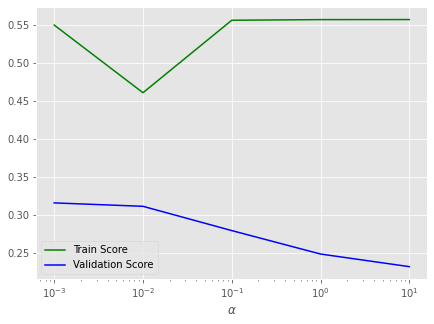

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.549472,0.315825,{'alpha': 1}
2,0.460594,0.311336,{'alpha': 10}
3,0.555790,0.279444,{'alpha': 0.1}
4,0.556626,0.248640,{'alpha': 0.01}
5,0.556707,0.232061,{'alpha': 0.001}


In [47]:
# view the complete results
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge_reg = GridSearchCV(Ridge(random_state=0),
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
ridge_reg.fit(X_train, y_train)
ridge_result = pd.DataFrame(ridge_reg.cv_results_)
ridge_result.index = ridge_result.rank_test_score
ridge_result.sort_index(inplace=True)

# plot the mean cross-validation scores
x_range = [0.001, 0.01, 0.1, 1, 10]
plt.figure(figsize=(7, 5))
plt.plot(x_range, ridge_result['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_range, ridge_result['mean_test_score'], c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.show()

ridge_result[['mean_train_score', 'mean_test_score', 'params']]

In [48]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    ridge_reg.best_params_, ridge_reg.best_score_))

Best Parameter: {'alpha': 1}
Average cross-validation score: 0.3158


## Lasso

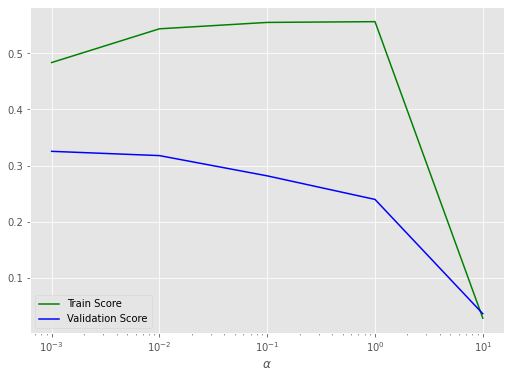

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.483731,0.325394,"{'alpha': 1, 'max_iter': 10000}"
2,0.543920,0.317769,"{'alpha': 0.1, 'max_iter': 10000}"
3,0.555319,0.281640,"{'alpha': 0.01, 'max_iter': 10000}"
4,0.556661,0.239594,"{'alpha': 0.001, 'max_iter': 10000}"
5,0.027806,0.035742,"{'alpha': 10, 'max_iter': 10000}"


In [49]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'max_iter':[10000]}
lasso_reg = GridSearchCV(Lasso(random_state=0),
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
lasso_reg.fit(X_train, y_train)
lasso_result = pd.DataFrame(lasso_reg.cv_results_)
lasso_result.index = lasso_result.rank_test_score
lasso_result.sort_index(inplace=True)

# plot the mean cross-validation scores
x_range = [0.001, 0.01, 0.1, 1, 10]
plt.figure(figsize=(8.5, 6))
plt.plot(x_range, lasso_result['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_range, lasso_result['mean_test_score'], c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.show()

lasso_result[['mean_train_score', 'mean_test_score', 'params']]

In [50]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    lasso_reg.best_params_, lasso_reg.best_score_))

Best Parameter: {'alpha': 1, 'max_iter': 10000}
Average cross-validation score: 0.3254


## Polynomial Regression

In [51]:
for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    scores = cross_val_score(LinearRegression(), X_train_poly, y_train, cv=5)
    print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [-2.94823054e+21 -3.79033432e+19 -5.58235924e+20 -1.59731910e+19
 -5.21599024e+20]
Cross-validation scores: [-2.15762714e+11 -3.26983204e+10 -1.12958117e-01 -2.30482910e+10
 -4.68076085e+11]


In [70]:
best_score = 0
for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    score = cross_val_score(lreg, X_train_poly, y_train, cv = 5).mean()
    if score > best_score:
            best_score = score
            best_parameters = {'degree': n}

print("Best parameters: {}".format(best_parameters))
print("Average cross-validation score: {:.4f}".format(best_score))

Best parameters: 0
Average cross-validation score: 0.0000


## Linear Suppor Vector Machine

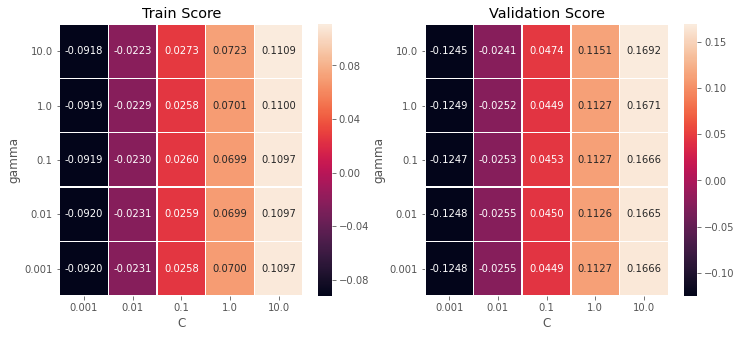

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.110868,0.169230,"{'C': 10, 'epsilon': 10}"
2,0.109958,0.167129,"{'C': 10, 'epsilon': 1}"
3,0.109725,0.166640,"{'C': 10, 'epsilon': 0.1}"
4,0.109741,0.166553,"{'C': 10, 'epsilon': 0.001}"
5,0.109741,0.166504,"{'C': 10, 'epsilon': 0.01}"
6,0.072276,0.115116,"{'C': 1, 'epsilon': 10}"
7,0.070054,0.112743,"{'C': 1, 'epsilon': 1}"
8,0.069957,0.112740,"{'C': 1, 'epsilon': 0.001}"
9,0.069934,0.112672,"{'C': 1, 'epsilon': 0.1}"


In [69]:
# view the complete results
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10], 'epsilon': [0.001, 0.01, 0.1, 1, 10]}
linsvm_reg = GridSearchCV(LinearSVR(random_state=0),
                       param_grid,
                       cv=5,
                       return_train_score=True,
                       scoring='r2')
linsvm_reg.fit(X_train, y_train)
linsvm_result = pd.DataFrame(linsvm_reg.cv_results_)
linsvm_result.index = linsvm_result.rank_test_score
linsvm_result.sort_index(inplace=True)

results = pd.DataFrame(linsvm_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['epsilon'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['epsilon'])

# plot the mean cross-validation scores
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Train Score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation Score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

linsvm_result[['mean_train_score', 'mean_test_score', 'params']]

In [54]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    linsvm_reg.best_params_, linsvm_reg.best_score_))

Best Parameter: {'C': 10, 'epsilon': 10}
Average cross-validation score: 0.1692


## Kerenlized Support Vector Machine

#### Linear

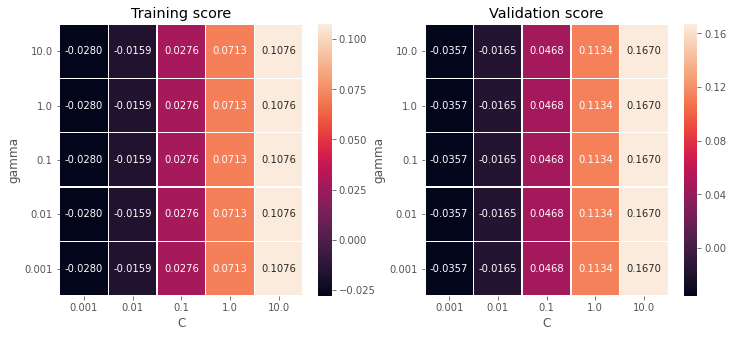

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.107631,0.166952,"{'C': 10, 'gamma': 10}"
1,0.107631,0.166952,"{'C': 10, 'gamma': 0.1}"
1,0.107631,0.166952,"{'C': 10, 'gamma': 0.01}"
1,0.107631,0.166952,"{'C': 10, 'gamma': 0.001}"
1,0.107631,0.166952,"{'C': 10, 'gamma': 1}"
6,0.071273,0.113438,"{'C': 1, 'gamma': 10}"
6,0.071273,0.113438,"{'C': 1, 'gamma': 1}"
6,0.071273,0.113438,"{'C': 1, 'gamma': 0.1}"
6,0.071273,0.113438,"{'C': 1, 'gamma': 0.01}"


In [63]:
# view the complete results
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
svclinear_reg = GridSearchCV(SVR(kernel='linear', max_iter=2e3),
                             param_grid,
                             cv=5,
                             return_train_score=True,
                             scoring='r2')
svclinear_reg.fit(X_train, y_train)
svclinear_result = pd.DataFrame(svclinear_reg.cv_results_)
svclinear_result.index = svclinear_result.rank_test_score
svclinear_result.sort_index(inplace=True)

# plot the mean cross-validation scores
results = pd.DataFrame(svclinear_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['gamma'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['gamma'])


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

svclinear_result[['mean_train_score', 'mean_test_score', 'params']]

In [56]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    svclinear_reg.best_params_, svclinear_reg.best_score_))

Best Parameter: {'C': 10, 'gamma': 0.001}
Average cross-validation score: 0.1670


#### RBF

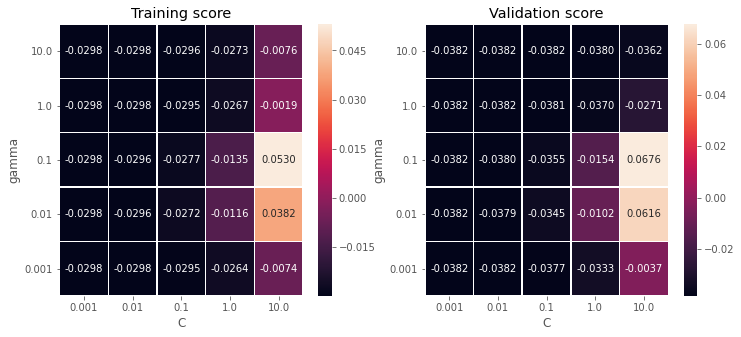

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.053049,0.067642,"{'C': 10, 'gamma': 0.1}"
2,0.038183,0.061614,"{'C': 10, 'gamma': 0.01}"
3,-0.007421,-0.003750,"{'C': 10, 'gamma': 0.001}"
4,-0.011585,-0.010199,"{'C': 1, 'gamma': 0.01}"
5,-0.013518,-0.015433,"{'C': 1, 'gamma': 0.1}"
6,-0.001950,-0.027137,"{'C': 10, 'gamma': 1}"
7,-0.026426,-0.033275,"{'C': 1, 'gamma': 0.001}"
8,-0.027249,-0.034518,"{'C': 0.1, 'gamma': 0.01}"
9,-0.027740,-0.035511,"{'C': 0.1, 'gamma': 0.1}"


In [57]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}
svcrbf_reg = GridSearchCV(SVR(kernel='rbf'),
                          param_grid,
                          cv=5,
                          n_jobs=-1,
                          return_train_score=True,
                          scoring='r2')
svcrbf_reg.fit(X_train, y_train)
svcrbf_result = pd.DataFrame(svcrbf_reg.cv_results_)
svcrbf_result.index = svcrbf_result.rank_test_score
svcrbf_result.sort_index(inplace=True)

# plot the mean cross-validation scores
results = pd.DataFrame(svcrbf_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['gamma'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['gamma'])

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

svcrbf_result[['mean_train_score', 'mean_test_score', 'params']]

In [58]:
print('Best Parameter: {0}\nAverage cross-vlidation score: {1:.4f}'.format(
    svcrbf_reg.best_params_, svcrbf_reg.best_score_))

Best Parameter: {'C': 10, 'gamma': 0.1}
Average cross-vlidation score: 0.0676


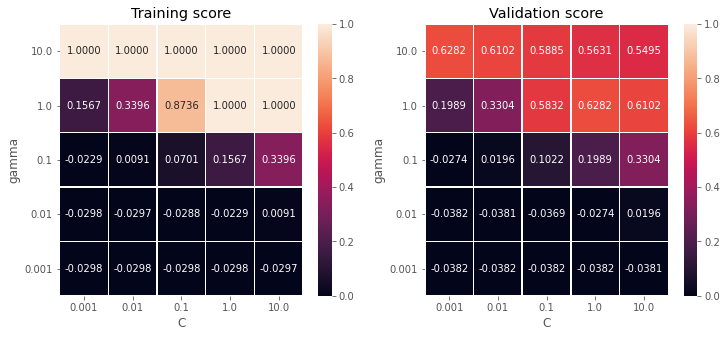

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.999973,0.628236,"{'C': 1, 'gamma': 1}"
2,0.999973,0.628235,"{'C': 0.001, 'gamma': 10}"
3,0.999990,0.610206,"{'C': 10, 'gamma': 1}"
4,0.999990,0.610168,"{'C': 0.01, 'gamma': 10}"
5,0.999994,0.588466,"{'C': 0.1, 'gamma': 10}"
6,0.873556,0.583165,"{'C': 0.1, 'gamma': 1}"
7,0.999975,0.563115,"{'C': 1, 'gamma': 10}"
8,0.999961,0.549532,"{'C': 10, 'gamma': 10}"
9,0.339592,0.330404,"{'C': 10, 'gamma': 0.1}"


In [59]:
# view the complete results
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
svrpoly_reg = GridSearchCV(SVR(kernel = 'poly'),
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
svrpoly_reg.fit(X_train, y_train)
svrpoly_result = pd.DataFrame(svrpoly_reg.cv_results_)
svrpoly_result.index = svrpoly_result.rank_test_score
svrpoly_result.sort_index(inplace=True)

# plot the mean cross-validation scores
results = pd.DataFrame(svrpoly_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['gamma'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['gamma'])

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, vmax=1, vmin=0,annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, vmax=1, vmin=0, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

svrpoly_result[['mean_train_score', 'mean_test_score', 'params']]

In [68]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    svrpoly_reg.best_params_, svrpoly_reg.best_score_))

Best Parameter: {'C': 1, 'gamma': 1}
Average cross-validation score: 0.6282


In [66]:
svr_poly = SVR(C=10, gamma=0.1, kernel='poly')
svr_poly.fit(X_train, y_train)
svr_poly.score(X_test, y_test)
print('Test score(R-square): {:.4f}'.format(svr_poly.score(X_test, y_test)))

Test score(R-square): 0.5262


In [67]:
from sklearn.metrics import mean_squared_error
y_pred =  svr_poly.predict(X_test)
print('Mean squared error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))

Mean squared error: 10090.2652


## Conclusion
The outcome is not ideal as we thought. We choose SVR-ploy as our best model as it has highest cross-validation score, which is 0.6282, but mean squared error is way too large and prediction is not useful. It maybe resulted by redundant features, which leads to overfitting 